In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [2]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# 1. 선형 회귀 모델

+ hypothesis : y = w[0] * x[0] + w[1] * x[1] + ... + b


+ 일반 선형회귀 모델
+ 릿지 선형회귀 모델
+ 라쏘 선형회귀 모델
+ 엘라스틱넷 선형회귀 모델 : 릿지 + 라쏘

w[0]: 0.393906  b: -0.031804


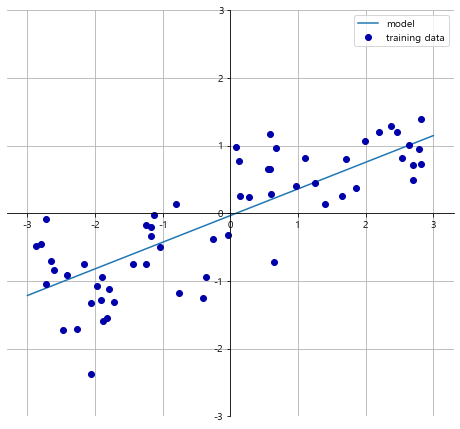

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

dir(lr)
print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 :  0.6700890315075756
테스트 점수 :  0.65933685968637
기울기 : [0.39390555], 절편 : -0.031804343026759746


In [13]:
##### 통계적 접근

from scipy import stats

result = stats.linregress(X_train.reshape(-1), y_train.reshape(-1))
result

LinregressResult(slope=0.39390555116733944, intercept=-0.031804343026759774, rvalue=0.8185896600297219, pvalue=6.4641460612798074e-12, stderr=0.042149264068325865)

#### 1) 사례 1 : 전기 생산량과 소비량

+ 귀무 가설 : 전기 생산량과 소비량은 상관 관계가 없다.
+ 대립 가설 : 전기 생산량과 소비량은 상관 관계가 있다.

In [14]:
# 월별 전기 사용량(백만 Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

In [15]:
### 통계적 분석

result = stats.linregress(X, y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

In [16]:
### 머신 러닝

X_arr = np.array(X)
X_arr = X_arr.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_arr, y)

print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

기울기 : [0.49560324], 절편 : 0.919581428068942


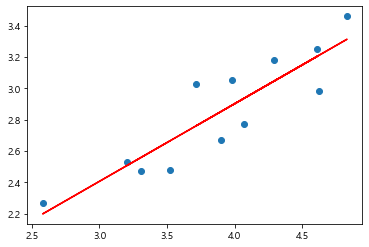

In [19]:
plt.scatter(X, y)
plt.plot(X, lr.coef_ * X + lr.intercept_, c="red")

In [22]:
### 생산량이 5일때 사용량은 얼마일까?

print(lr.coef_ * 5 + lr.intercept_)
print(lr.predict([[5]]))

[3.39759761]
[3.39759761]


#### 2) 사례 2 : 보스턴 주택 가격

In [38]:
boston = load_boston()
print(boston.data.shape)
# print(boston.target)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [37]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202129


#### 3) 고차원 특성에 대한 과적합

In [41]:
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

(506, 104)
훈련 점수 :  0.9520519609032729
테스트 점수 :  0.6074721959665803


### (1) 릿지(Ridge) 회귀 모델

+ L2 규제(Regularization)
+ MSE항에 Penelty항을 추가
+ 알파를 크게 하면 페널티의 효과가 커지고(가중치 감소, 모델이 단순), 작게하면 그 반대가 된다.
+ 모델을 단순하게 해주고 훈련셋에 대한 성능 차이를 절충하는 효과

In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha=1.0

print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744752


In [43]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 점수 : ", ridge10.score(X_train, y_train))
print("테스트 점수 : ", ridge10.score(X_test, y_test))

훈련 점수 :  0.7882787115369616
테스트 점수 :  0.6359411489177311


In [46]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 점수 : ", ridge01.score(X_train, y_train))
print("테스트 점수 : ", ridge01.score(X_test, y_test))

훈련 점수 :  0.9282273685001985
테스트 점수 :  0.7722067936479811


(-25.0, 25.0)

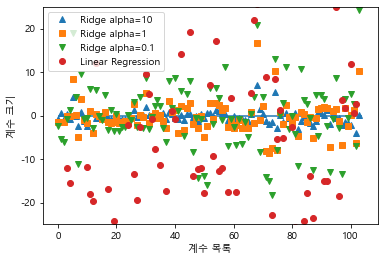

In [53]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="Linear Regression")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

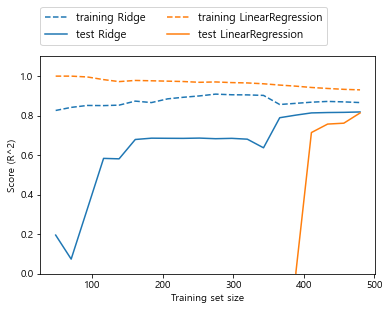

In [54]:
# 알파값을 1로 고정한 상태에서 데이터의 크기 조절

mglearn.plots.plot_ridge_n_samples()

In [56]:
print("사용한 특성의 수 : ", np.sum(ridge.coef_ != 0))
print("사용한 특성의 수 : ", np.sum(ridge01.coef_ != 0))
print("사용한 특성의 수 : ", np.sum(ridge10.coef_ != 0))

사용한 특성의 수 :  104
사용한 특성의 수 :  104
사용한 특성의 수 :  104


### (2) 라쏘(Lasso) 회귀 모델

+ L1 규제 사용
+ 알파를 크게 하면 페널티의 효과가 커지고 작게하면 그 반대가 된다.
+ 특성 선택이 자동적으로 이루어진다.

In [57]:
from sklearn.linear_model import Lasso

In [59]:
lasso = Lasso().fit(X_train, y_train) # alpha=1.0

print("훈련 점수 : ", lasso.score(X_train, y_train))
print("테스트 점수 : ", lasso.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso.coef_ != 0))

훈련 점수 :  0.29323768991114607
테스트 점수 :  0.20937503255272294
사용한 특성의 수 :  4


In [60]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)

print("훈련 점수 : ", lasso001.score(X_train, y_train))
print("테스트 점수 : ", lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

훈련 점수 :  0.8961122320864717
테스트 점수 :  0.7677995670886713
사용한 특성의 수 :  32


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


In [61]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)

print("훈련 점수 : ", lasso00001.score(X_train, y_train))
print("테스트 점수 : ", lasso00001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

훈련 점수 :  0.9420931515237063
테스트 점수 :  0.6976541391663642
사용한 특성의 수 :  100


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915621, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


<ipython-input-66-f2e0e8671955>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(ridge01.coef_, "o", Label="Ridge alpha=0.1")


(-25.0, 25.0)

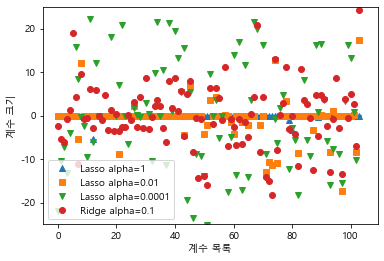

In [66]:
plt.plot(lasso.coef_, "^", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "s", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, "o", Label="Ridge alpha=0.1")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

### (3) 예제1 

+ 키에 따라 몸무게가 얼마인지 예측하는 프로그램 작성

In [71]:
df = pd.read_csv("data/heights.csv")
df

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


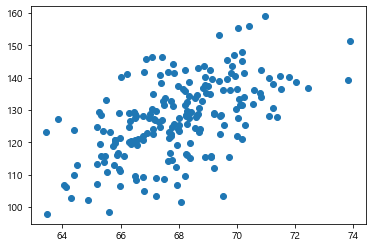

In [72]:
X = df["height"]
y = df["weight"]

plt.plot(X, y, "o")

In [73]:
result = stats.linregress(X, y)
result

LinregressResult(slope=3.432676129271628, intercept=-106.02770644878126, rvalue=0.5568647346122992, pvalue=1.1029015151266264e-17, stderr=0.3638682118583795)

In [74]:
lr = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [75]:
### 키가 70인 사람의 몸무게는 얼마일까?
lr.predict([[70]])

array([134.2596226])

In [78]:
lr.score(X.values.reshape(-1, 1), y)

0.31009833265482645

### (4) 예제2

+ Boston Housing Sample

In [87]:
"""
속성	내용
-----------------
CRIM	범죄율
ZN	25,000평방피트당 주거지역의 비율
INDUS	비소매 상업지구 비율(단위: 에이커)
CHAS	찰스강에 인접해 있으면 1, 그렇지 않으면 0
NOX	일산화질소 농도(단위:0.1ppm)
RM	주택당 방의 수
AGE	1940년 이전에 건설된 주택의 비율
DIS	5개의 보스턴 직업고용센터와의 거리(가중 평균)
RAD	고속도로 접근성
TAX	재산세율
PTRATIO	학생/교사비율
B	흑인비율
LSTAT	하위계층비율
MEDV	타운의 주택 가격 중앙값(단위: 1,000달러
"""
boston = load_boston()
boston

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [94]:
boston_model = LinearRegression()
boston_model.fit(X_train, y_train)

LinearRegression()

In [95]:
print("훈련 점수 : ", boston_model.score(X_train, y_train))
print("테스트 점수 : ", boston_model.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202129


In [103]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(10)

df["MEDV"] = boston.target
df.head(10)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


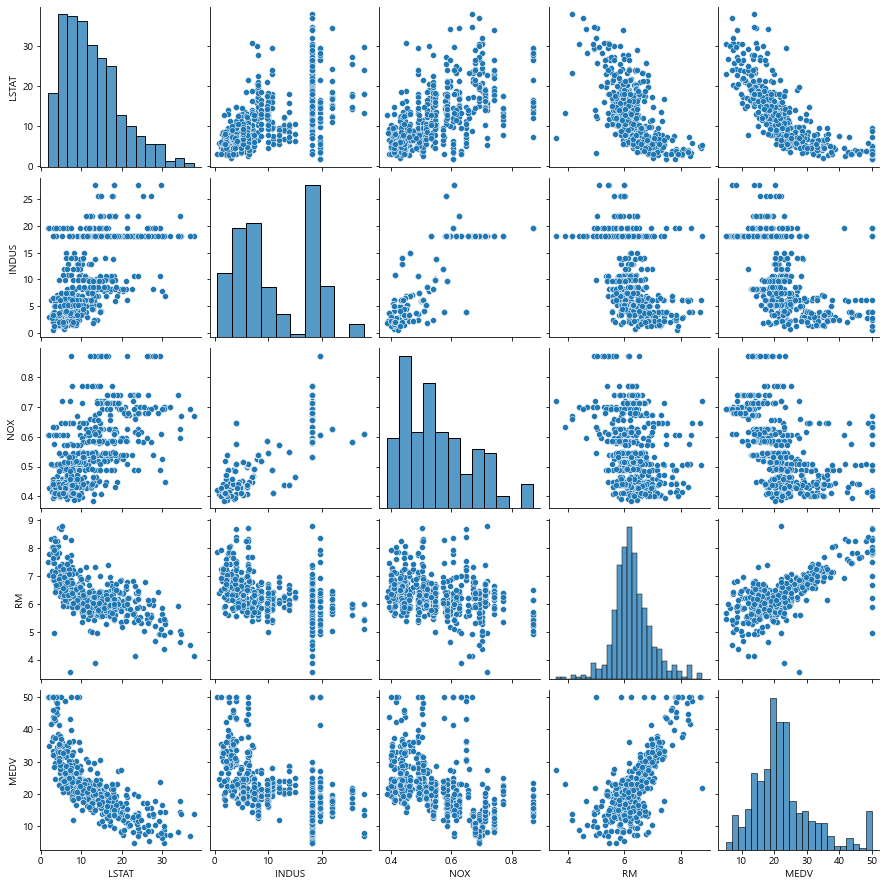

In [104]:
sns.pairplot(df[["LSTAT", "INDUS", "NOX", "RM", "MEDV"]], size=2.5)

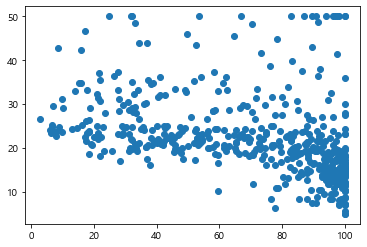

In [105]:
plt.scatter(df[["AGE"]], df[["MEDV"]])

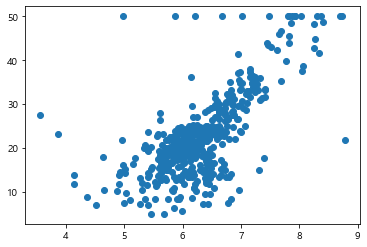

In [108]:
plt.scatter(df[["RM"]], df[["MEDV"]])

<AxesSubplot:>

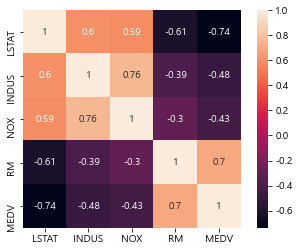

In [113]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
heat = np.corrcoef(df[cols].values.T)
sns.heatmap(heat, annot=True, yticklabels=cols, xticklabels=cols, square=True)

In [114]:
### 방이 10개일때 집값은 얼마인가?


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### (5) 예제3

+ Manhatten Housing Sample

In [ ]:
"""
rental_id	rental ID
rent	임대료 ($)
bedrooms	침실수
bathrooms	화장실수
size_sqft	평수(feet)
min_to_subway	지하철과의 거리 (minutes)
floor	층수
building_age_yrs	건물 연령
no_fee	중계수수료 (0 for fee, 1 for no fee)
has_roofdeck	옥상 (o for no, 1 for yes)
has_washer_dryer	세탁기/건조기 (0/1)
has_doorman	도어맨 (0/1)
has_elevator	엘리베이터 (0/1)
has_dishwasher	식기세척기 (0/1)
has_patio	안마당(patio) (0/1)
has_gym	헬스장(gym) (0/1)
neighborhood	이웃 (ex: 한인타운)
submarket	submarket (ex: North Brooklyn)
borough	borough (ex: Brooklyn)
"""

In [ ]:
#### 설명계수(훈련 결과와 테스트 결과 비교)
#### 임대료 계산
#### 변수들의 관계를 시각화